# Predictive Model for Iris Case 

### Import libraries

In [1]:
import pandas            as pd 
import sklearn
import seaborn           as sn
import matplotlib.pyplot as plt
from sklearn             import neighbors
from sklearn.metrics     import accuracy_score
from sklearn.metrics     import confusion_matrix


## Model Building

### Reading the Training DataSet

In [2]:
iris_train = pd.read_csv("iris_training.csv")

### Analyzing the Training DataSet

In [3]:
iris_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
0,5.2,2.7,3.9,1.4,1.0,Versicolor
1,7.7,3.0,6.1,2.3,2.0,Virginica
2,7.0,3.2,4.7,1.4,1.0,Versicolor
3,6.8,3.2,5.9,2.3,2.0,Virginica
4,7.6,3.0,6.6,2.1,2.0,Virginica


In [4]:
iris_train.shape

(120, 6)

### Creating the Model [using kNN (k- Nearest Neighbors) Algorithm]

In [5]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=3)

### Training the Model

In [6]:
predictors = ["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]
target     = "target"

In [7]:
iris_train[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.2,2.7,3.9,1.4
1,7.7,3.0,6.1,2.3
2,7.0,3.2,4.7,1.4
3,6.8,3.2,5.9,2.3
4,7.6,3.0,6.6,2.1
...,...,...,...,...
115,6.2,2.8,4.8,1.8
116,6.0,3.0,4.8,1.8
117,6.4,2.8,5.6,2.1
118,7.2,3.6,6.1,2.5


In [8]:
classifier.fit(iris_train[predictors],iris_train[target])

KNeighborsClassifier(n_neighbors=3)

In [9]:
type(iris_train[target])

pandas.core.series.Series

In [10]:
iris_train["Prediction"] = classifier.predict(iris_train[predictors])

In [11]:
iris_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower,Prediction
0,5.2,2.7,3.9,1.4,1.0,Versicolor,1.0
1,7.7,3.0,6.1,2.3,2.0,Virginica,2.0
2,7.0,3.2,4.7,1.4,1.0,Versicolor,1.0
3,6.8,3.2,5.9,2.3,2.0,Virginica,2.0
4,7.6,3.0,6.6,2.1,2.0,Virginica,2.0
...,...,...,...,...,...,...,...
115,6.2,2.8,4.8,1.8,2.0,Virginica,2.0
116,6.0,3.0,4.8,1.8,2.0,Virginica,2.0
117,6.4,2.8,5.6,2.1,2.0,Virginica,2.0
118,7.2,3.6,6.1,2.5,2.0,Virginica,2.0


### Checking the Accuracy of our Model

In [12]:
accuracy_score(iris_train[target],iris_train["Prediction"])

0.95

### Confusion Matrix

In [13]:
# Confusion Matrix

df = pd.DataFrame(iris_train, columns=['target','Prediction'])

confusion_matrix = pd.crosstab(df['target'], df['Prediction'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0  2.0
Actual                  
0.0         34    0    0
1.0          0   41    3
2.0          0    3   39


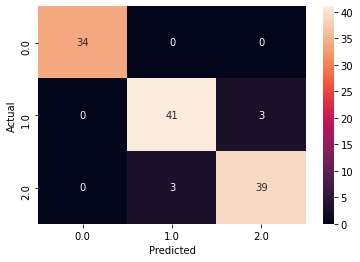

In [14]:
# Displaying the Confusion Matrix using Seaborn Heatmap

sn.heatmap(confusion_matrix, annot=True)
plt.show()

## Testing the Model (Making Predictions)

### Reading the Testing DataSet

In [15]:
iris_test = pd.read_csv("iris_test.csv")

### Analyzing the Training DataSet

In [16]:
iris_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
0,6.7,3.0,5.2,2.3,2.0,Virginica
1,7.3,2.9,6.3,1.8,2.0,Virginica
2,6.0,2.9,4.5,1.5,1.0,Versicolor
3,5.1,3.4,1.5,0.2,0.0,Setosa
4,6.7,3.0,5.0,1.7,1.0,Versicolor


In [17]:
iris_test.shape

(30, 6)

### Making Predictions

In [18]:
predictions = classifier.predict(iris_test[predictors])

In [19]:
iris_test["Prediction"] = classifier.predict(iris_test[predictors])

In [20]:
iris_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower,Prediction
0,6.7,3.0,5.2,2.3,2.0,Virginica,2.0
1,7.3,2.9,6.3,1.8,2.0,Virginica,2.0
2,6.0,2.9,4.5,1.5,1.0,Versicolor,1.0
3,5.1,3.4,1.5,0.2,0.0,Setosa,0.0
4,6.7,3.0,5.0,1.7,1.0,Versicolor,1.0


### Comparing with Actual Results (i.e our Target)

In [21]:
accuracy_score(iris_test[target],predictions)

1.0

In [22]:
# Confusion Matrix

df = pd.DataFrame(iris_test, columns=['target','Prediction'])

confusion_matrix = pd.crosstab(df['target'], df['Prediction'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0  2.0
Actual                  
0.0         16    0    0
1.0          0    6    0
2.0          0    0    8


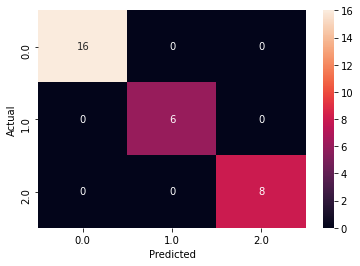

In [23]:
# Displaying the Confusion Matrix using Seaborn Heatmap

sn.heatmap(confusion_matrix, annot=True)
plt.show()